In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
feature = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
submit = pd.read_csv("sampleSubmission.csv")

In [5]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
submit.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [14]:
#データ数を確認（行,列）
feature.shape

(115064, 4)

In [15]:
stores.shape

(45, 3)

In [16]:
df_train.shape

(421570, 5)

In [17]:
df_test.shape

(115064, 4)

In [21]:
#df_train から "Store"を抽出
df_train["Store"] 　#45種類のストアがある

0          1
1          1
2          1
3          1
4          1
          ..
421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, Length: 421570, dtype: int64

In [23]:
df_train["Store"].nunique()

45

In [24]:
df_train["Dept"]

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [25]:
df_train["Dept"].nunique() #1～98の内、81カテゴリが存在(欠損値あり)

81

In [29]:
df_train["Dept"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [31]:
df_train["Date"]

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [32]:
df_train["Date"].nunique() #2010/02/05～2012/10/26の143週間分

143

In [33]:
df_test["Date"]

0         2012-11-02
1         2012-11-09
2         2012-11-16
3         2012-11-23
4         2012-11-30
             ...    
115059    2013-06-28
115060    2013-07-05
115061    2013-07-12
115062    2013-07-19
115063    2013-07-26
Name: Date, Length: 115064, dtype: object

In [34]:
df_test["Date"].nunique()

39

##学習データ
-店舗データに関しては、1～45の45店舗分
-カテゴリデータに関しては、1～99の81カテゴリ分
-2010/02/05～2012/10/26の143週分
###テストデータ
-2012/11/2～2013/7/26の39週分

<Axes: xlabel='Dept', ylabel='count'>

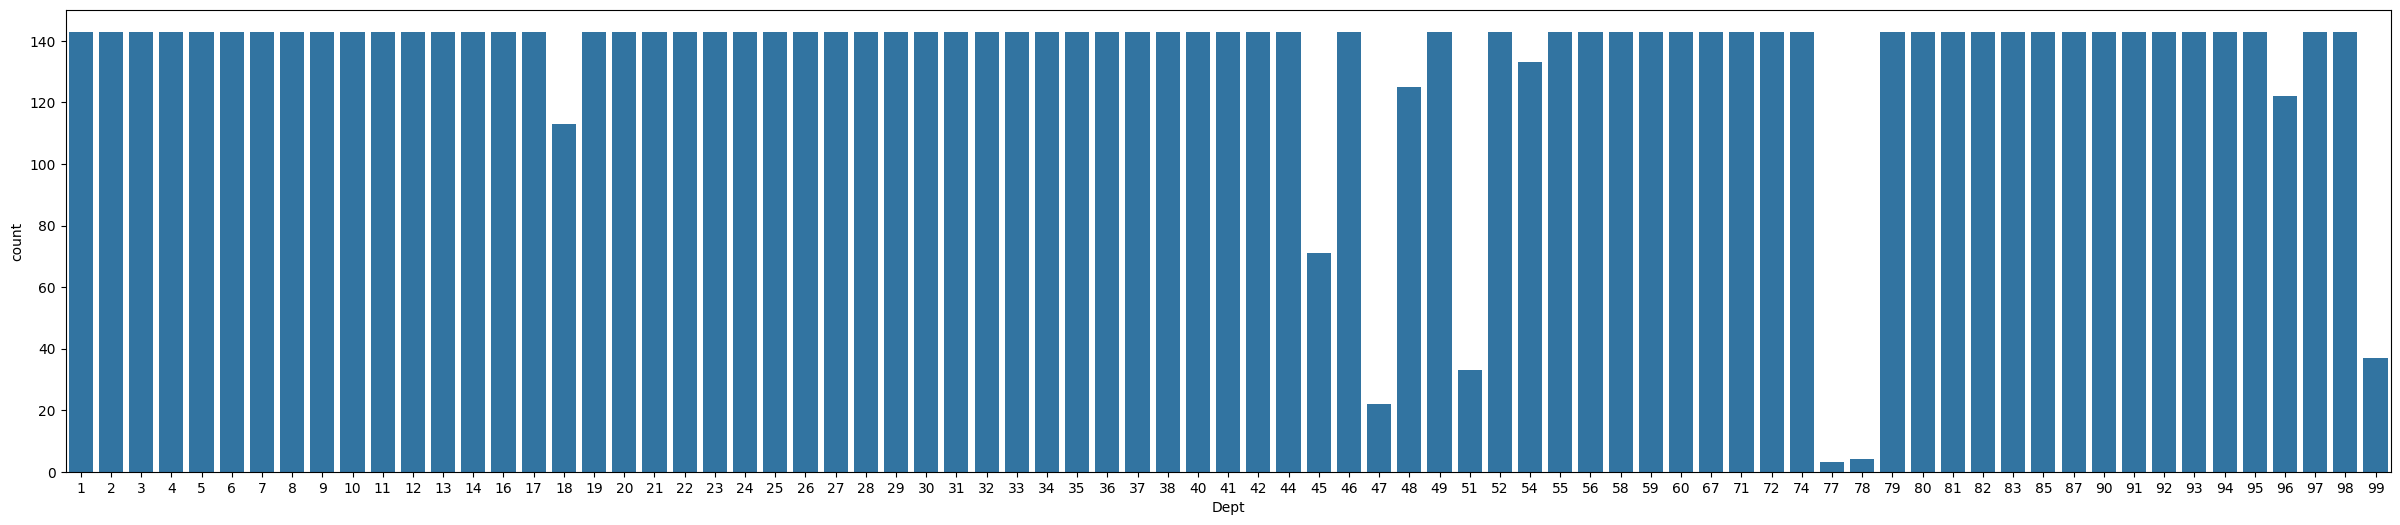

In [37]:
#df_trainの店舗1のdept(1～99の81部門)で、143週分あるかどうか⇒週によって売上が立ってない
plt.figure(figsize=(30,6))
sns.countplot(x="Dept",data=df_train[df_train["Store"]==1])

<Axes: xlabel='Dept', ylabel='count'>

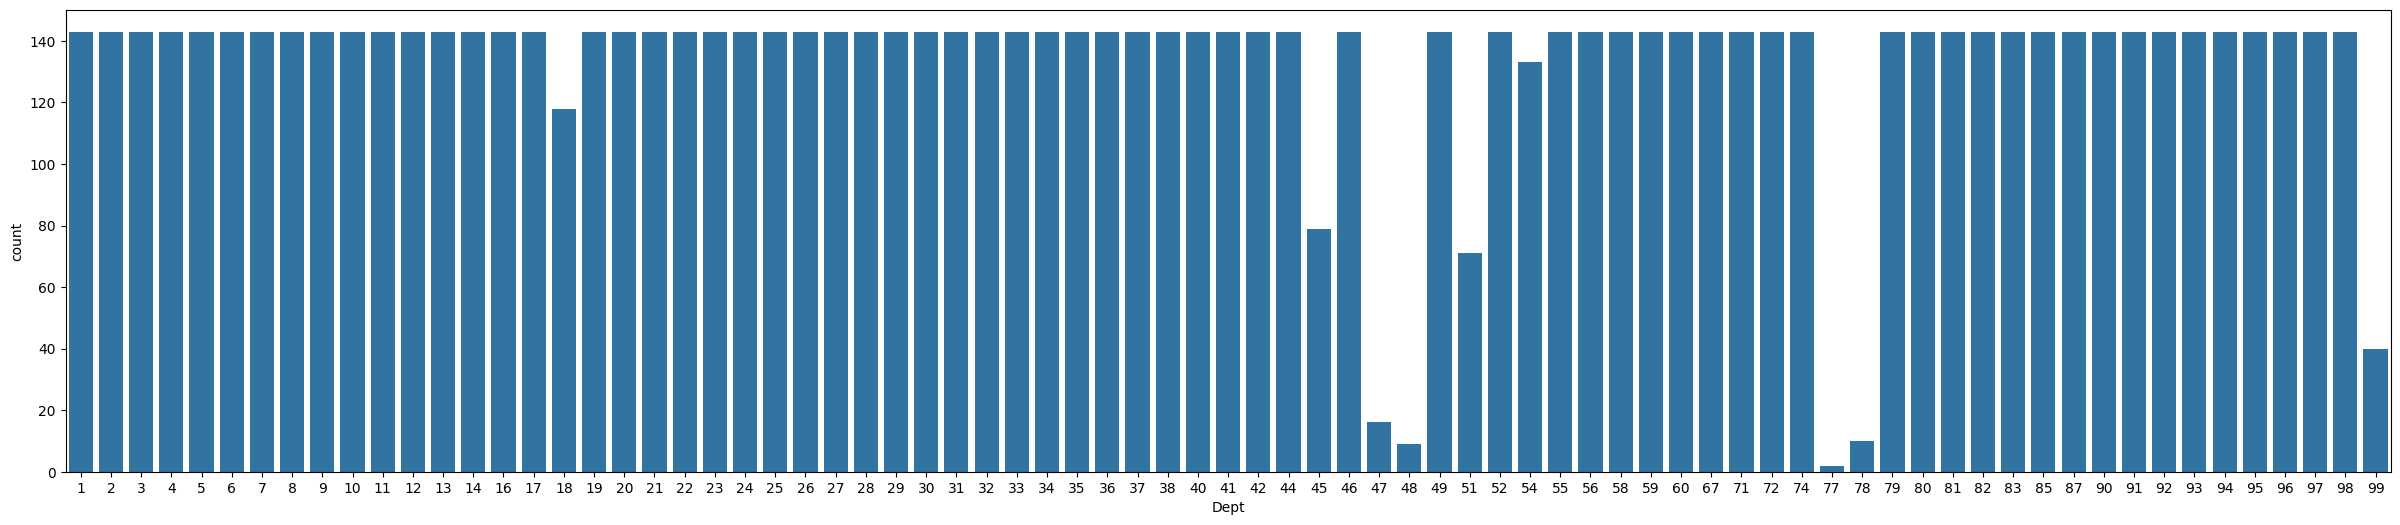

In [38]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept",data=df_train[df_train["Store"]==32])

<Axes: xlabel='Store', ylabel='count'>

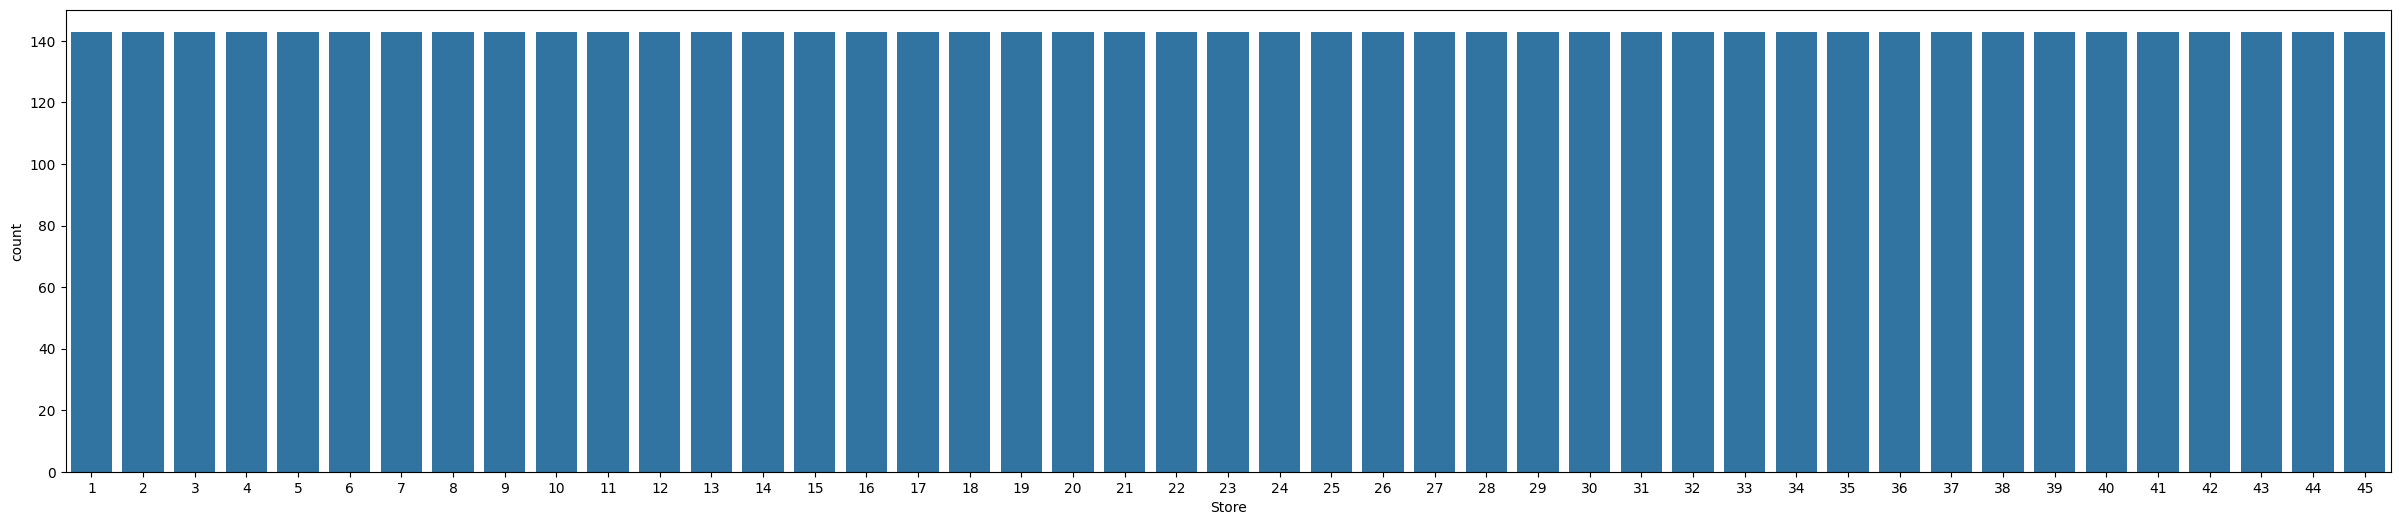

In [39]:
#1～45店舗で、カテゴリ1の売上推移を確認
plt.figure(figsize=(30,6))
sns.countplot(x="Store",data=df_train[df_train["Dept"]==1])

<Axes: xlabel='Store', ylabel='count'>

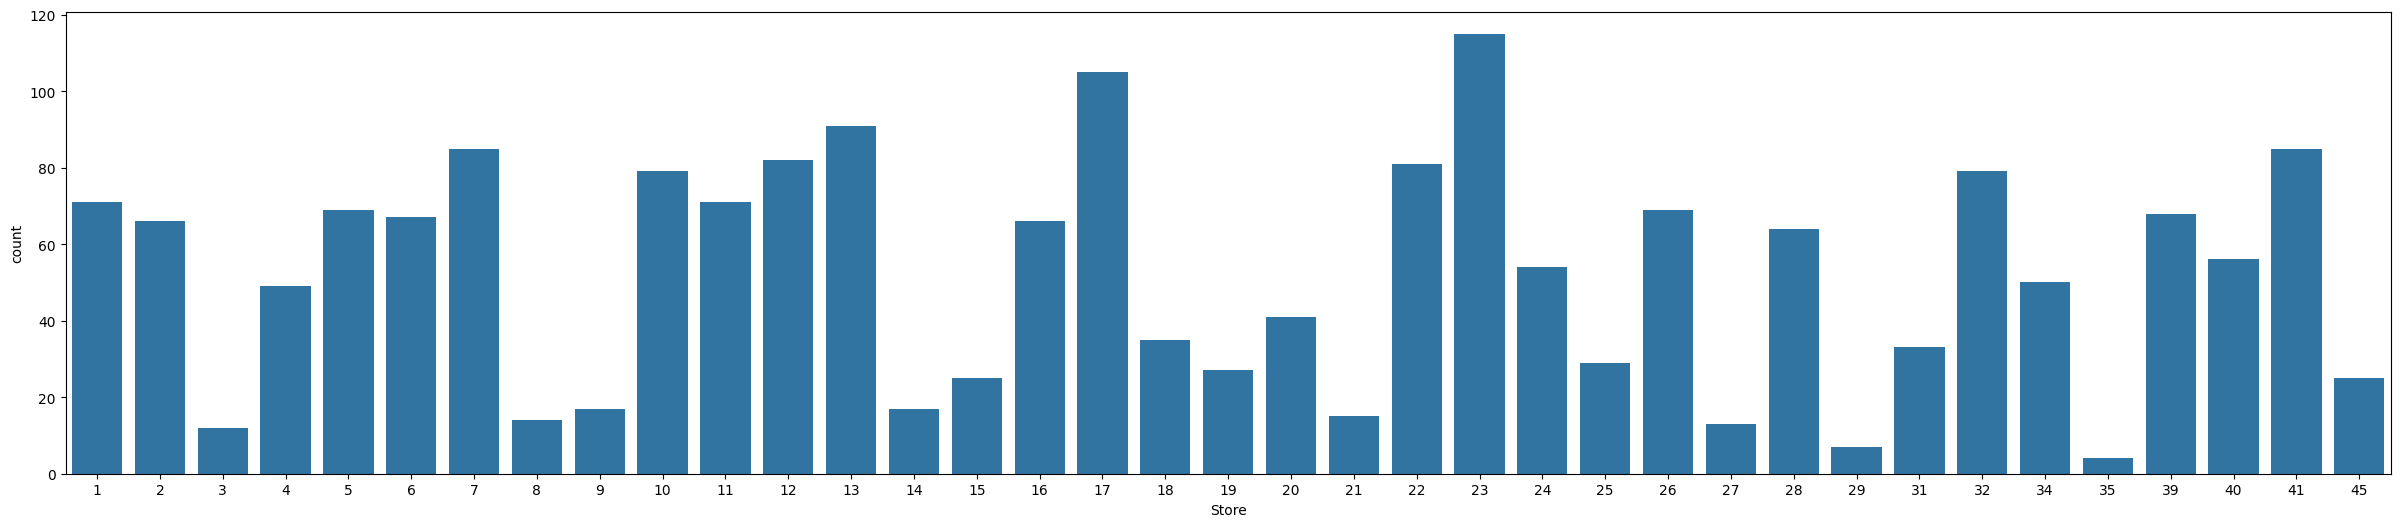

In [41]:
#1～45店舗で、カテゴリ45の売上推移を確認⇒どの店舗もカテゴリ45の売上は微妙
plt.figure(figsize=(30,6))
sns.countplot(x="Store",data=df_train[df_train["Dept"]==45])

In [47]:
#index(行)をStores、columns(列)をDateに指定⇒カテゴリ45の売上を縦軸:店舗、横軸:日付にして確認
pd.pivot_table(df_train[df_train["Dept"]==45],index="Store",columns="Date",values="Weekly_Sales")

Date,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,...,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26
Store,,,,,,,,,,,,,,,,,,,,,
1,37.44,34.47,22.94,45.41,74.35,29.97,8.50,10.00,13.50,35.97,...,NaN,NaN,10.47,NaN,52.35,20.94,NaN,10.47,NaN,20.94
2,27.50,20.50,42.25,164.50,32.50,158.00,26.00,19.50,52.00,-118.00,...,NaN,5.97,NaN,NaN,NaN,20.94,NaN,10.47,NaN,NaN
3,4.50,NaN,4.00,NaN,NaN,4.50,8.50,NaN,4.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.50,2.50,NaN,14.97,NaN,NaN,5.96,13.43,NaN,2.96,...,10.47,NaN,10.47,NaN,10.47,NaN,NaN,NaN,NaN,10.47
5,NaN,NaN,NaN,10.96,26.88,1.51,3.36,NaN,4.96,9.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24.62,42.00,14.06,10.00,47.00,101.00,70.00,74.00,32.00,79.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.00,23.78,21.54,14.54,22.81,36.02,3.00,NaN,NaN,19.06,...,5.97,NaN,107.46,8.97,NaN,8.97,NaN,NaN,35.82,NaN
8,NaN,2.50,NaN,NaN,4.00,2.50,NaN,NaN,NaN,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,7.50,7.50,5.50,2.00,NaN,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Date', ylabel='Store'>

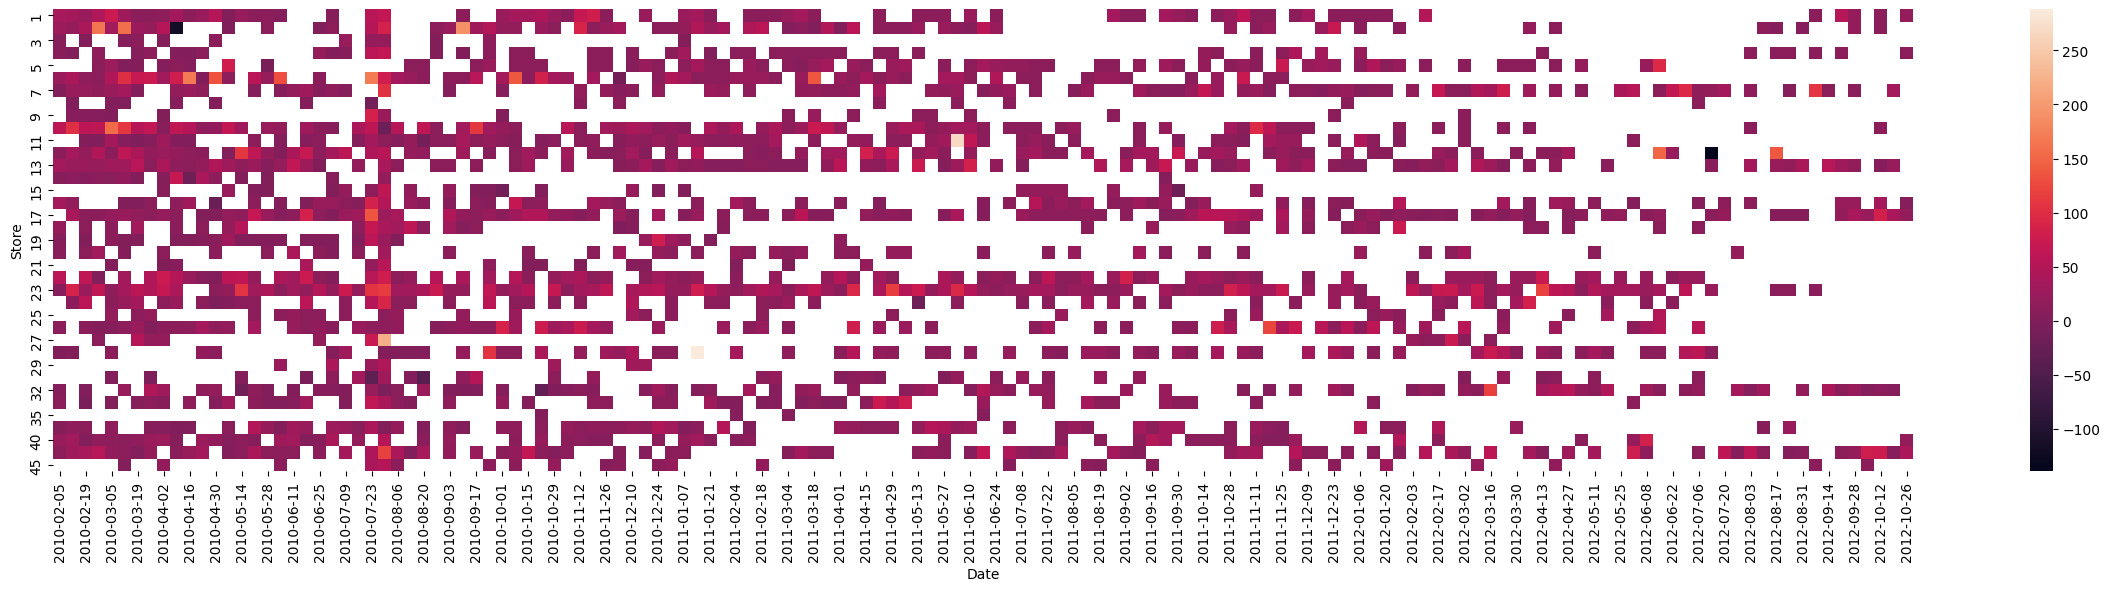

In [49]:
plt.figure(figsize=(30,6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"]==45],index="Store",columns="Date",values="Weekly_Sales")) #時系列でカテゴリ45は売上が減少傾向

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

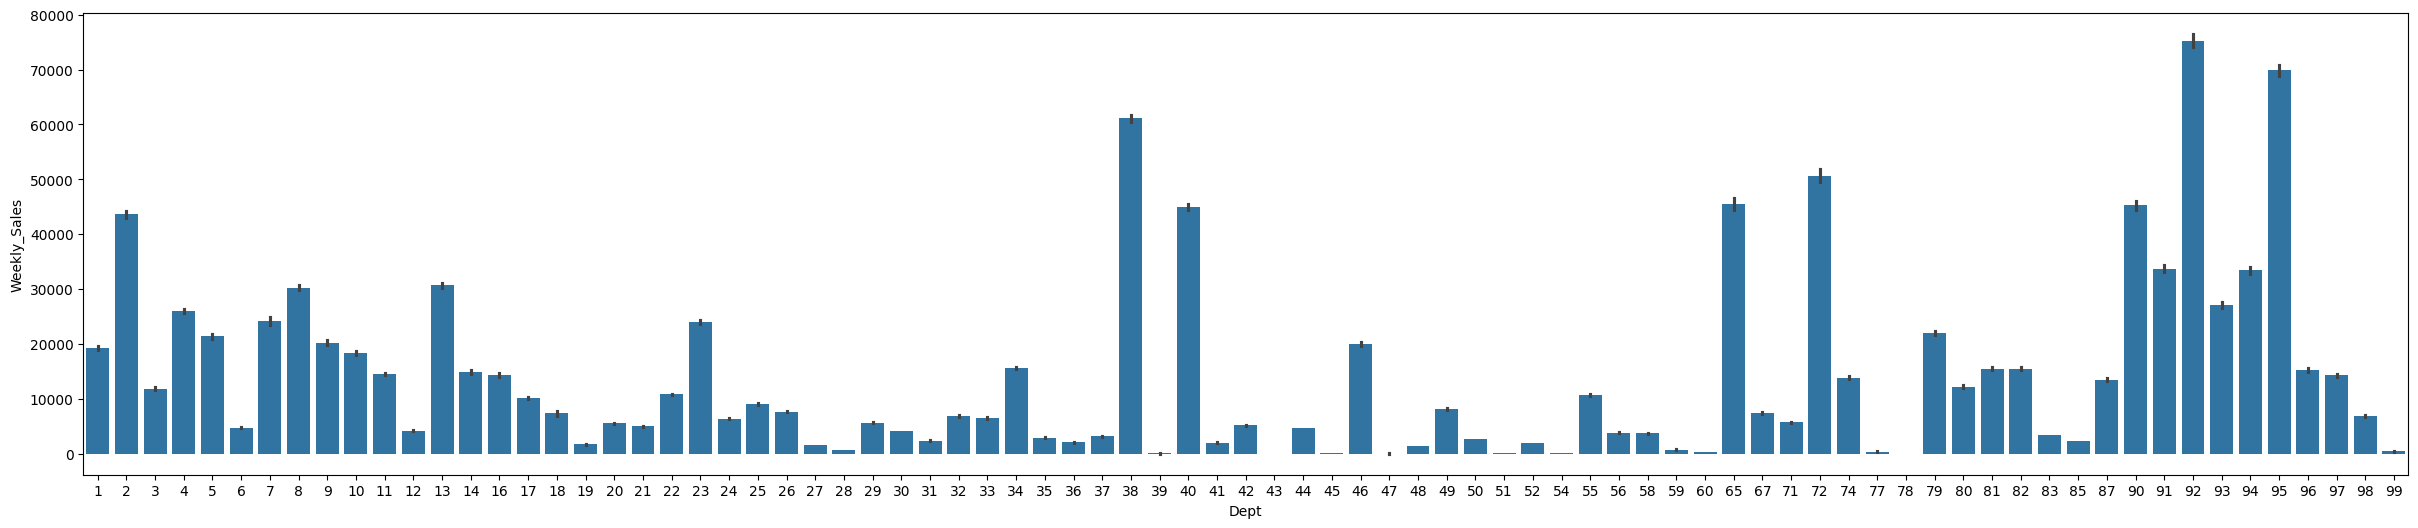

In [54]:
plt.figure(figsize=(30,6))
sns.barplot(x="Dept",y="Weekly_Sales",data=df_train)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

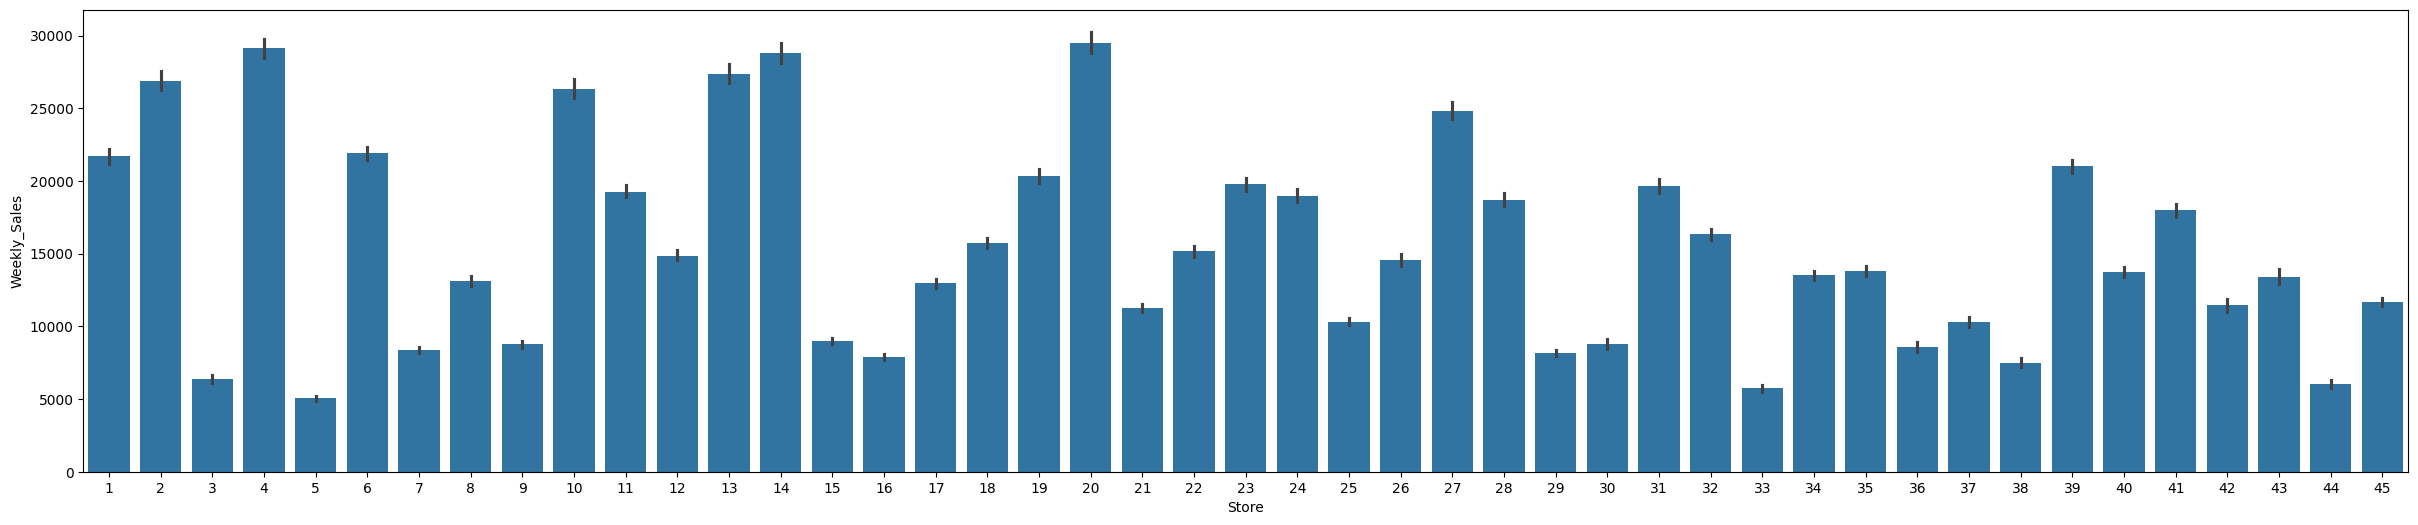

In [55]:
plt.figure(figsize=(30,6))
sns.barplot(x="Store",y="Weekly_Sales",data=df_train)

In [56]:
stores #店舗における、タイプとそのサイズを示す

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [58]:
#df_train データフレームを Store 列でグループ化し、各グループの数値列の合計を計算
df_train.groupby("Store").sum()

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,454749,2010-02-052010-02-122010-02-192010-02-262010-0...,2.224028e+08,723
2,455425,2010-02-052010-02-122010-02-192010-02-262010-0...,2.753824e+08,722
3,370825,2010-02-052010-02-122010-02-192010-02-262010-0...,5.758674e+07,633
4,457340,2010-02-052010-02-122010-02-192010-02-262010-0...,2.995440e+08,727
5,371526,2010-02-052010-02-122010-02-192010-02-262010-0...,4.547569e+07,640
6,453812,2010-02-052010-02-122010-02-192010-02-262010-0...,2.237561e+08,721
7,432878,2010-02-052010-02-122010-02-192010-02-262010-0...,8.159828e+07,691
8,432217,2010-02-052010-02-122010-02-192010-02-262010-0...,1.299512e+08,696
9,355292,2010-02-052010-02-122010-02-192010-02-262010-0...,7.778922e+07,625


In [62]:
#その中から "Weekl_sales" 列を選択して、インデックスをリセットする処理
df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [67]:
#df_trainのstoreのデータに対してweekly_salesがdate毎になっているのでまとめる
pd.merge(stores,df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index())

,Store,Type,Size,Weekly_Sales
0,1,A,151315,2.224028e+08
1,2,A,202307,2.753824e+08
2,3,B,37392,5.758674e+07
3,4,A,205863,2.995440e+08
4,5,B,34875,4.547569e+07
5,6,A,202505,2.237561e+08
6,7,B,70713,8.159828e+07
7,8,A,155078,1.299512e+08
8,9,B,125833,7.778922e+07
9,10,B,126512,2.716177e+08


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

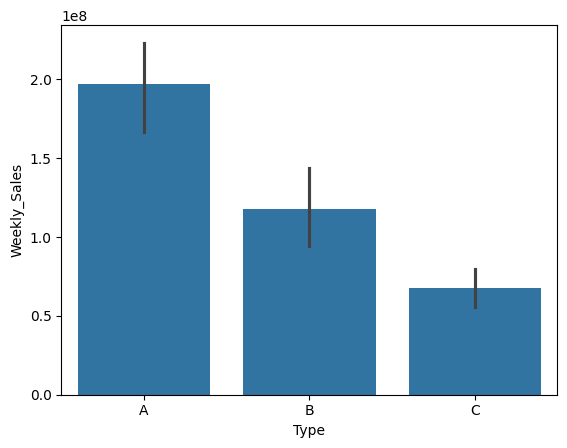

In [82]:
#storesのデータにweekly_salesを入れてサイズによって売上がどう変化するか調べる
df_temp=pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(),stores)
sns.barplot(x="Type",y="Weekly_Sales",data=df_tmp)

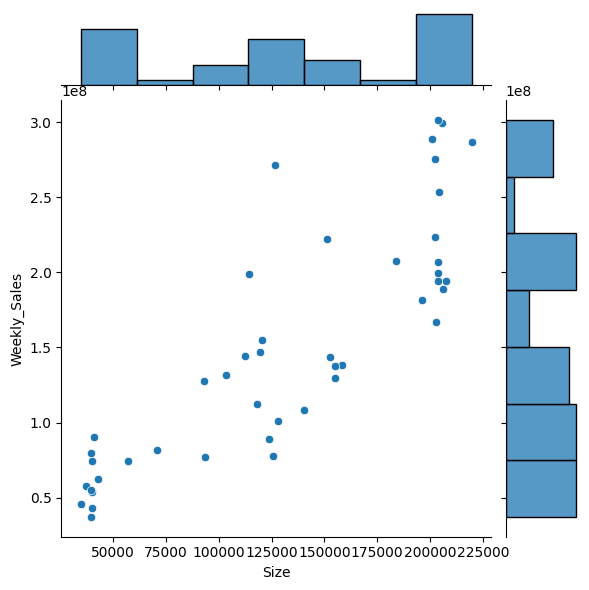

In [83]:
#散布図
sns.jointplot(x="Size",y="Weekly_Sales",data=df_temp)

In [84]:
#相関関係
df_tmp.corr(numeric_only=True)

,Store,Size,Weekly_Sales
Store,1.00000,-0.244270,-0.350100
Size,-0.24427,1.000000,0.846161
Weekly_Sales,-0.35010,0.846161,1.000000


In [85]:
df_tmp

,Store,Type,Size,Weekly_Sales
0,1,A,151315,2.224028e+08
1,2,A,202307,2.753824e+08
2,3,B,37392,5.758674e+07
3,4,A,205863,2.995440e+08
4,5,B,34875,4.547569e+07
5,6,A,202505,2.237561e+08
6,7,B,70713,8.159828e+07
7,8,A,155078,1.299512e+08
8,9,B,125833,7.778922e+07
9,10,B,126512,2.716177e+08


In [89]:
#df_trainのdateを軸に作り替え
df_tmp2 = df_train.groupby("Date").sum()
df_tmp2

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...
2012-09-28,65866,130785,43734899.40,0
2012-10-05,66296,132468,47566639.31,0
2012-10-12,66453,133371,46128514.25,0


In [88]:
#reset_indexでカラムに入る
df_tmp2 = df_train.groupby("Date").sum().reset_index()
df_tmp2

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,65124,130557,49750740.50,0
1,2010-02-12,65082,131179,48336677.63,2956
2,2010-02-19,65610,131897,48276993.78,0
3,2010-02-26,65045,130161,43968571.13,0
4,2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...,...
138,2012-09-28,65866,130785,43734899.40,0
139,2012-10-05,66296,132468,47566639.31,0
140,2012-10-12,66453,133371,46128514.25,0
141,2012-10-19,65630,130255,45122410.57,0


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

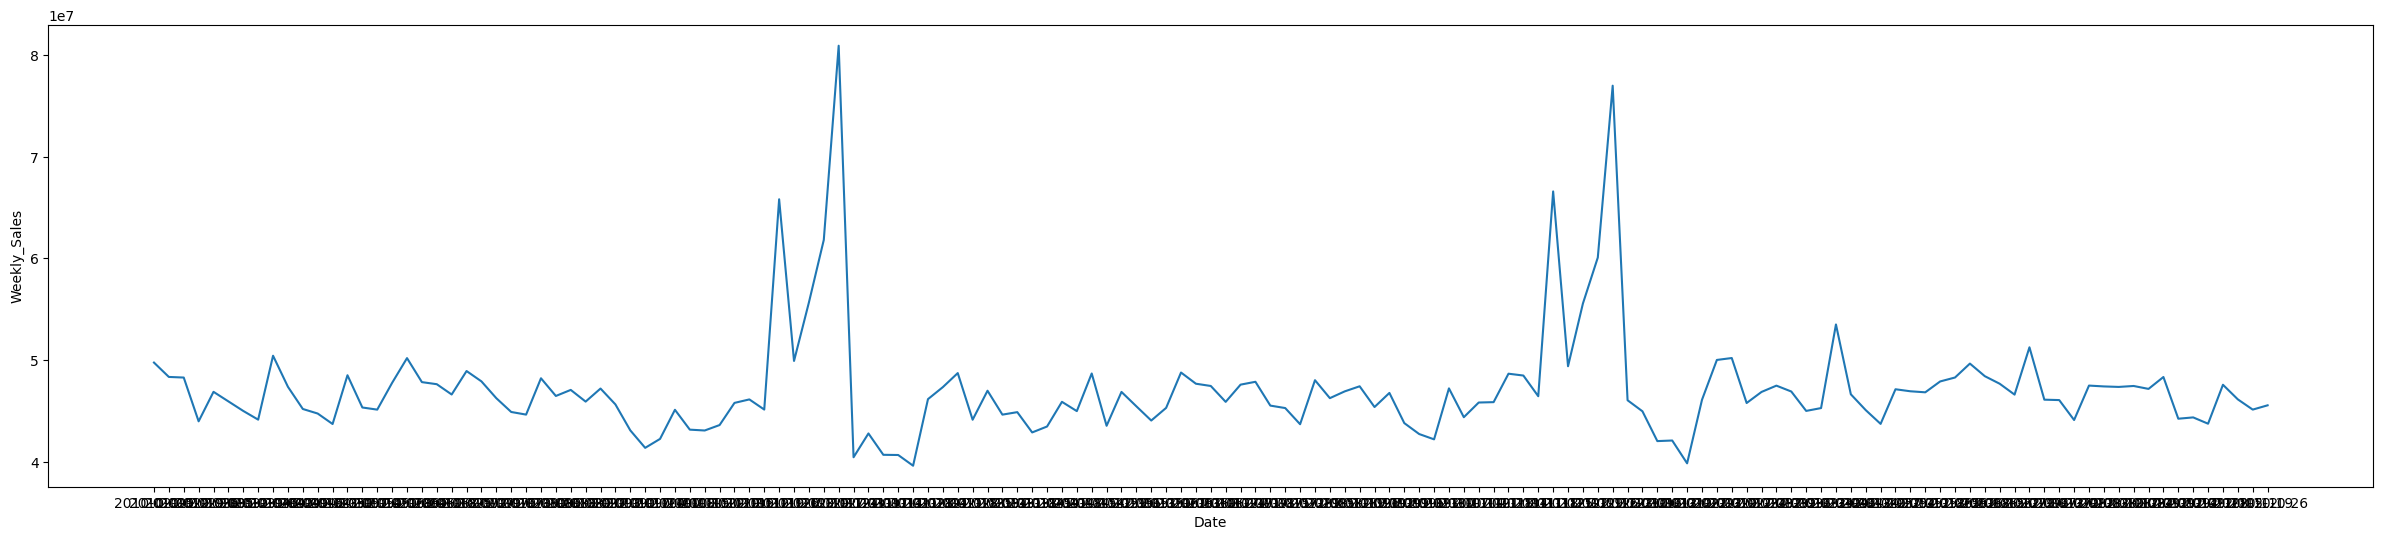

In [92]:
plt.figure(figsize=(30,6))
df_tmp2 = df_train.groupby("Date").sum().reset_index()
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp2)

In [94]:
#まず、dateごとでまとめた後、Storeごとに整理
df_tmp3 = df_train.groupby(["Date","Store"]).sum().reset_index()
df_tmp3

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,3184,1643690.90,0
1,2010-02-05,2,3251,2136989.46,0
2,2010-02-05,3,2640,461622.22,0
3,2010-02-05,4,3233,2135143.87,0
4,2010-02-05,5,2458,317173.10,0
...,...,...,...,...,...
6430,2012-10-26,41,3244,1316542.59,0
6431,2012-10-26,42,2411,514756.08,0
6432,2012-10-26,43,2242,587603.55,0
6433,2012-10-26,44,2465,361067.07,0


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

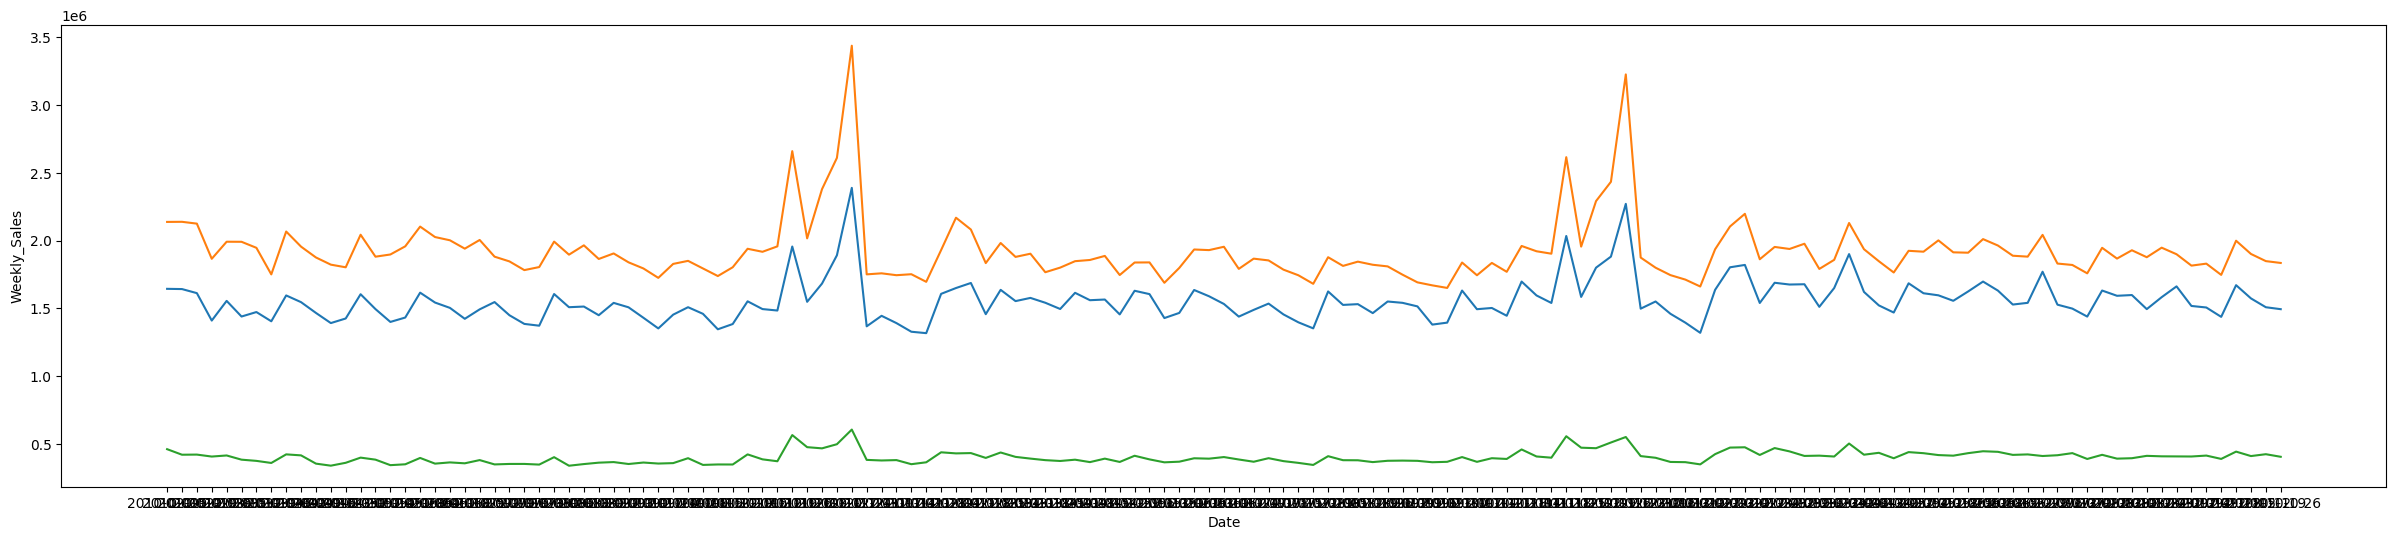

In [98]:
#store1のdateごとのweekly_salesの推移
plt.figure(figsize=(30,6))
df_tmp3 = df_train.groupby(["Date","Store"]).sum().reset_index()
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==1])
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==2])
sns.lineplot(x="Date",y="Weekly_Sales",data=df_tmp3[df_tmp3["Store"]==3])

In [99]:
df_tmp2 = df_train.groupby("Date").sum().reset_index()

#Weekly_Salesの高い順でソートをかける
df_tmp2.sort_values("Weekly_Sales",ascending=False).head(10)

,Date,Store,Dept,Weekly_Sales,IsHoliday
46,2010-12-24,65507,130460,80931415.60,0
98,2011-12-23,67073,135571,76998241.31,0
94,2011-11-25,66864,135801,66593605.26,3021
42,2010-11-26,65217,129373,65821003.24,2938
45,2010-12-17,65676,130438,61820799.85,0
97,2011-12-16,66894,134714,60085695.94,0
44,2010-12-10,65354,129960,55666770.39,0
96,2011-12-09,66809,134656,55561147.70,0
113,2012-04-06,66323,132587,53502315.87,0
126,2012-07-06,65939,132367,51253021.88,0
